In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata

numaster = getdata('numaster.fits')


DetA0
0
10610015003 Crab_PA330_GR15 9.64839586671517 4.435904713469538 0.32659225053955837
10610010001 Crab_PA330_GR10 14.994196761202332 6.953144434720731 0.5189642214338802
10610007002 Crab_PA330_GR07 103.82778817974845 48.78325545340197 0.4578279213380223
80402015004 MAXI_J1348m630_SLPA178 13.837235128029029 6.408352393926463 2.5167826850707495
10402603002 MAXI_J1820p070_SLPA130 6.888023597108286 3.1360959739296144 1.1264749559562095
90401314002 MAXI_J1820p070_SLPA140 8.21162922535225 3.7593576195556766 2.060264769164771
90401311006 MAXI_J1820p070_SLPA155 9.839053524509694 4.525681912215571 2.1027853787308635
80302312002 MAXI_J1535m571_SLPA030 8.187405149030605 3.7479509457324247 0.975348890170774
80302310002 MAXI_J1535m571_SLPA005 15.83182840544149 7.347569832948743 3.8554587539424143
1
10610025001 Crab_PA330_GR25 4.727608880745069 8.7353146863474 0.1526064223550474
10610020001 Crab_PA330_GR20 6.508367211430812 12.129895931918197 0.2736165704930812
10602003004 Crab_sl_PA330 5.35964

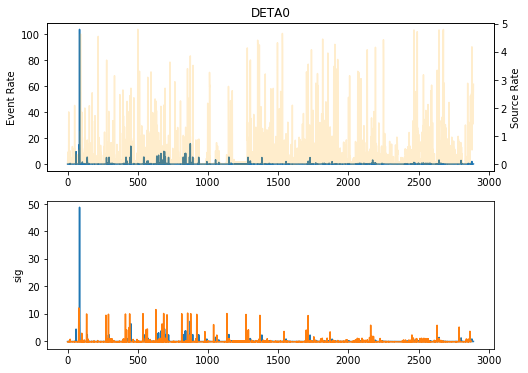

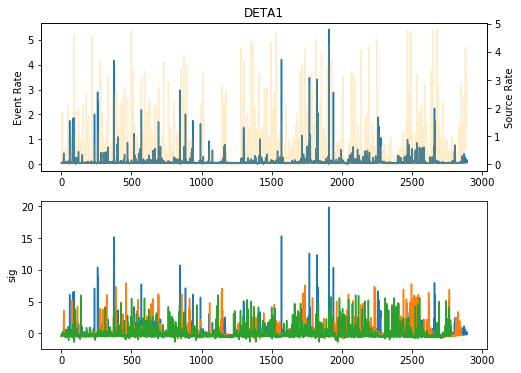

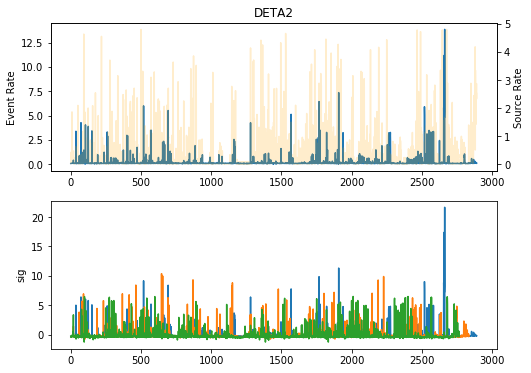

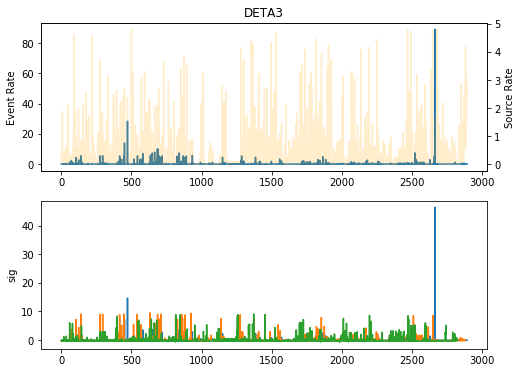

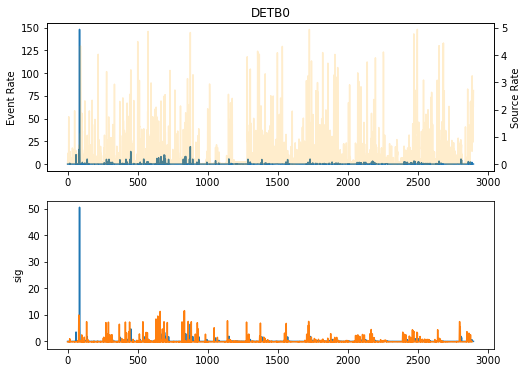

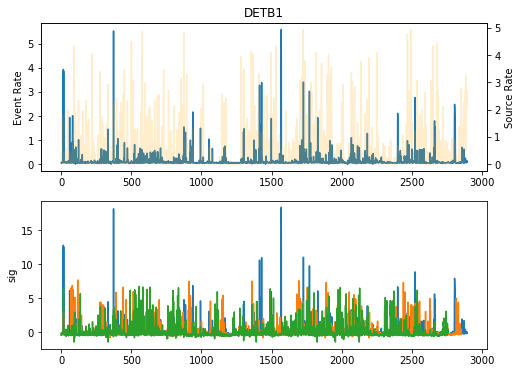

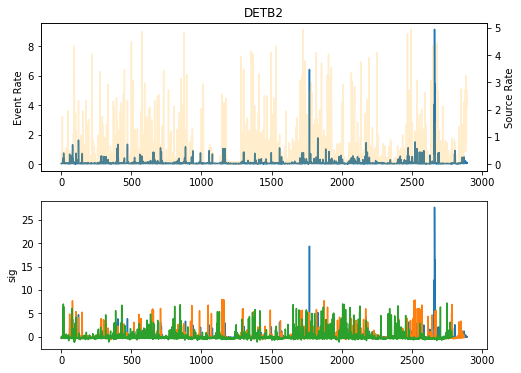

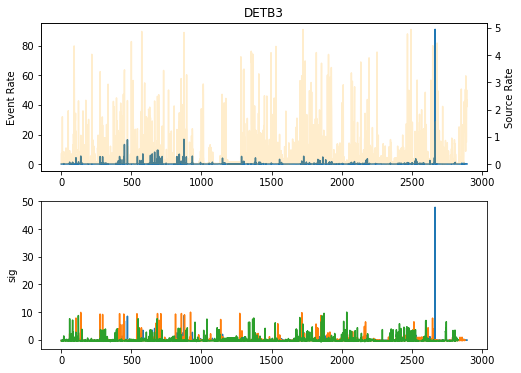

In [3]:

potential_sl = {'A':{'names':[], 'seq':[]},
                'B':{'names':[], 'seq':[]}}

for mod in ['A', 'B']:
    for det in [0, 1, 2, 3]:
        seq = []
        bgd_rate = []
        src_rate = []
        names = []


        print(f'Det{mod}{det}')
        with open('stray_light_det.txt') as f:
            for line in f:
                fields = line.split()
                if len(fields) != 7:
                    continue
                fpm = fields[1]
                if fpm != mod:
                    continue
                rate = float(fields[2])
                if rate > 5:
                    continue

                seq = np.append(seq, fields[0])
                bgd_rate = np.append(bgd_rate, float(fields[det+3]))
                src_rate = np.append(src_rate, rate)
                
                
                
            fig, ax = plt.subplots(nrows=2, figsize = (8, 6))
            ax[0].plot(bgd_rate)
            ax2 = ax[0].twinx()
            ax2.plot(src_rate, color ='orange', alpha=0.2)
            ax2.set_ylabel('Source Rate')
            ax[0].set_title(f'DET{mod}{det}')
            ax[0].set_ylabel('Event Rate')

            
            
            for iterate in range(3):
                if (det ==0) & (iterate > 1):
                    continue
                print(iterate)
                mean = bgd_rate.mean()
                stddev = bgd_rate.std()
                sig = (bgd_rate - mean) / stddev
                ax[1].plot( sig)
                ax[1].set_ylabel(f'sig')

                high_cts = (np.where( sig > 3))
                for ind in high_cts[0]:
                    nuind = np.where(numaster['OBSID'] == seq[ind])
                    name = numaster['NAME'][nuind[0]]
                    if name.startswith('Sgr'):
                        continue
                    if name.startswith('GalSurvey'):
                        continue
                    if name.startswith('Gal_Cen'):
                        continue
                    if name.startswith('gcmag'):
                        continue

                        
                    if name.startswith('Coma'):
                        continue
                    if name in potential_sl[mod]['names']:
                        continue

                    potential_sl[mod]['names'] = np.append(potential_sl[mod]['names'], name)
                    potential_sl[mod]['seq'] = np.append(potential_sl[mod]['seq'], seq[ind])
                    print(seq[ind],name[0], bgd_rate[ind], sig[ind], src_rate[ind])
                bgd_rate = np.delete(bgd_rate, high_cts[0])
                seq = np.delete(seq, high_cts[0])
                src_rate = np.delete(src_rate, high_cts[0])

In [4]:
mod = 'A'
for mod in ['A', 'B']:
    with open(f'FPM{mod}_v2.txt', 'w') as f:
        for name, seq in zip(potential_sl[mod]['names'], potential_sl[mod]['seq']):
            nuind = (np.where(numaster['OBSID'] == seq))[0]
            f.write(f"{name}, {seq}, {numaster['RA'][nuind][0]}, {numaster['DEC'][nuind][0]}, {numaster['ROLL_ANGLE'][nuind][0]}, {numaster['EXPOSURE_A'][nuind][0]}\n")
        